In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chapter 2. Statistical Learning

## Applied Exercises

### Exercise 8: The College data set 

The **college** data set contains demographic characteristics, tuition, and more for USA colleges. The data set, which can be found in the file `College.csv`, contains a number of variables for 777 different universities and colleges in the US.

**Variable** | **Description**
:- | :-
**Private** | Public/private indicator
**Apps** | Number of applications received
**Accept** | Number of applicants accepted
**Enroll** | Number of new students enrolled
**Top10perc** | New students from top 10 % of high school class
**Top25perc** | New students from top 25 % of high school class
**F.Undergrad** | Number of full-time undergraduates
**P.Undergrad** | Number of part-time undergraduates
**Outstate** | Out-of-state tuition
**Room.Board** | Room and board costs
**Books** | Estimated book costs
**Personal** | Estimated personal spending
**PhD** | Percent of faculty with Ph.D.’s
**Terminal** | Percent of faculty with terminal degree
**S.F.Ratio** | Student/faculty ratio
**perc.alumni** | Percent of alumni who donate
**Expend** | Instructional expenditure per student
**Grad.Rate** | Graduation rate

In [11]:
college = pd.read_csv('data/College.csv', index_col=0, dtype={'Private': 'category'})
college.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

#### Exercise 8a 

Use the `summary()` function to produce a numerical summary of the variables in the data set.

**Note:** to fit better in this notebook, I will print summary by groups of columns.

In [12]:
college.describe(include='category')

Private
count      777
unique       2
top        Yes
freq       565

In [13]:
college.describe().transpose().round(2)

count      mean      std     min     25%     50%      75%  \
Apps         777.0   3001.64  3870.20    81.0   776.0  1558.0   3624.0   
Accept       777.0   2018.80  2451.11    72.0   604.0  1110.0   2424.0   
Enroll       777.0    779.97   929.18    35.0   242.0   434.0    902.0   
Top10perc    777.0     27.56    17.64     1.0    15.0    23.0     35.0   
Top25perc    777.0     55.80    19.80     9.0    41.0    54.0     69.0   
F.Undergrad  777.0   3699.91  4850.42   139.0   992.0  1707.0   4005.0   
P.Undergrad  777.0    855.30  1522.43     1.0    95.0   353.0    967.0   
Outstate     777.0  10440.67  4023.02  2340.0  7320.0  9990.0  12925.0   
Room.Board   777.0   4357.53  1096.70  1780.0  3597.0  4200.0   5050.0   
Books        777.0    549.38   165.11    96.0   470.0   500.0    600.0   
Personal     777.0   1340.64   677.07   250.0   850.0  1200.0   1700.0   
PhD          777.0     72.66    16.33     8.0    62.0    75.0     85.0   
Terminal     777.0     79.70    14.72    24.0    71.0    82.0     92.0   
S.F.Ratio    777.0     14.09     3.96     2.5    11.5    13.6     16.5   
perc.alumni  777.0     22.74    12.39     0.0    13.0    21.0     31.0   
Expend       777.0   9660.17  5221.77  3186.0  6751.0  8377.0  10830.0   
Grad.Rate    777.0     65.46    17.18    10.0    53.0    65.0     78.0   

                 max  
Apps         48094.0  
Accept       26330.0  
Enroll        6392.0  
Top10perc       96.0  
Top25perc      100.0  
F.Undergrad  31643.0  
P.Undergrad  21836.0  
Outstate     21700.0  
Room.Board    8124.0  
Books         2340.0  
Personal      6800.0  
PhD            103.0  
Terminal       100.0  
S.F.Ratio       39.8  
perc.alumni     64.0  
Expend       56233.0  
Grad.Rate      118.0

There’s way more private universities than public universities.

#### Exercise 8b

Use the `pairs()`  function to produce a scatterplot matrix of the first ten columns or variables of the data.

**Note:** Whenever possible, I will use a package that I think it will be prettier or better.

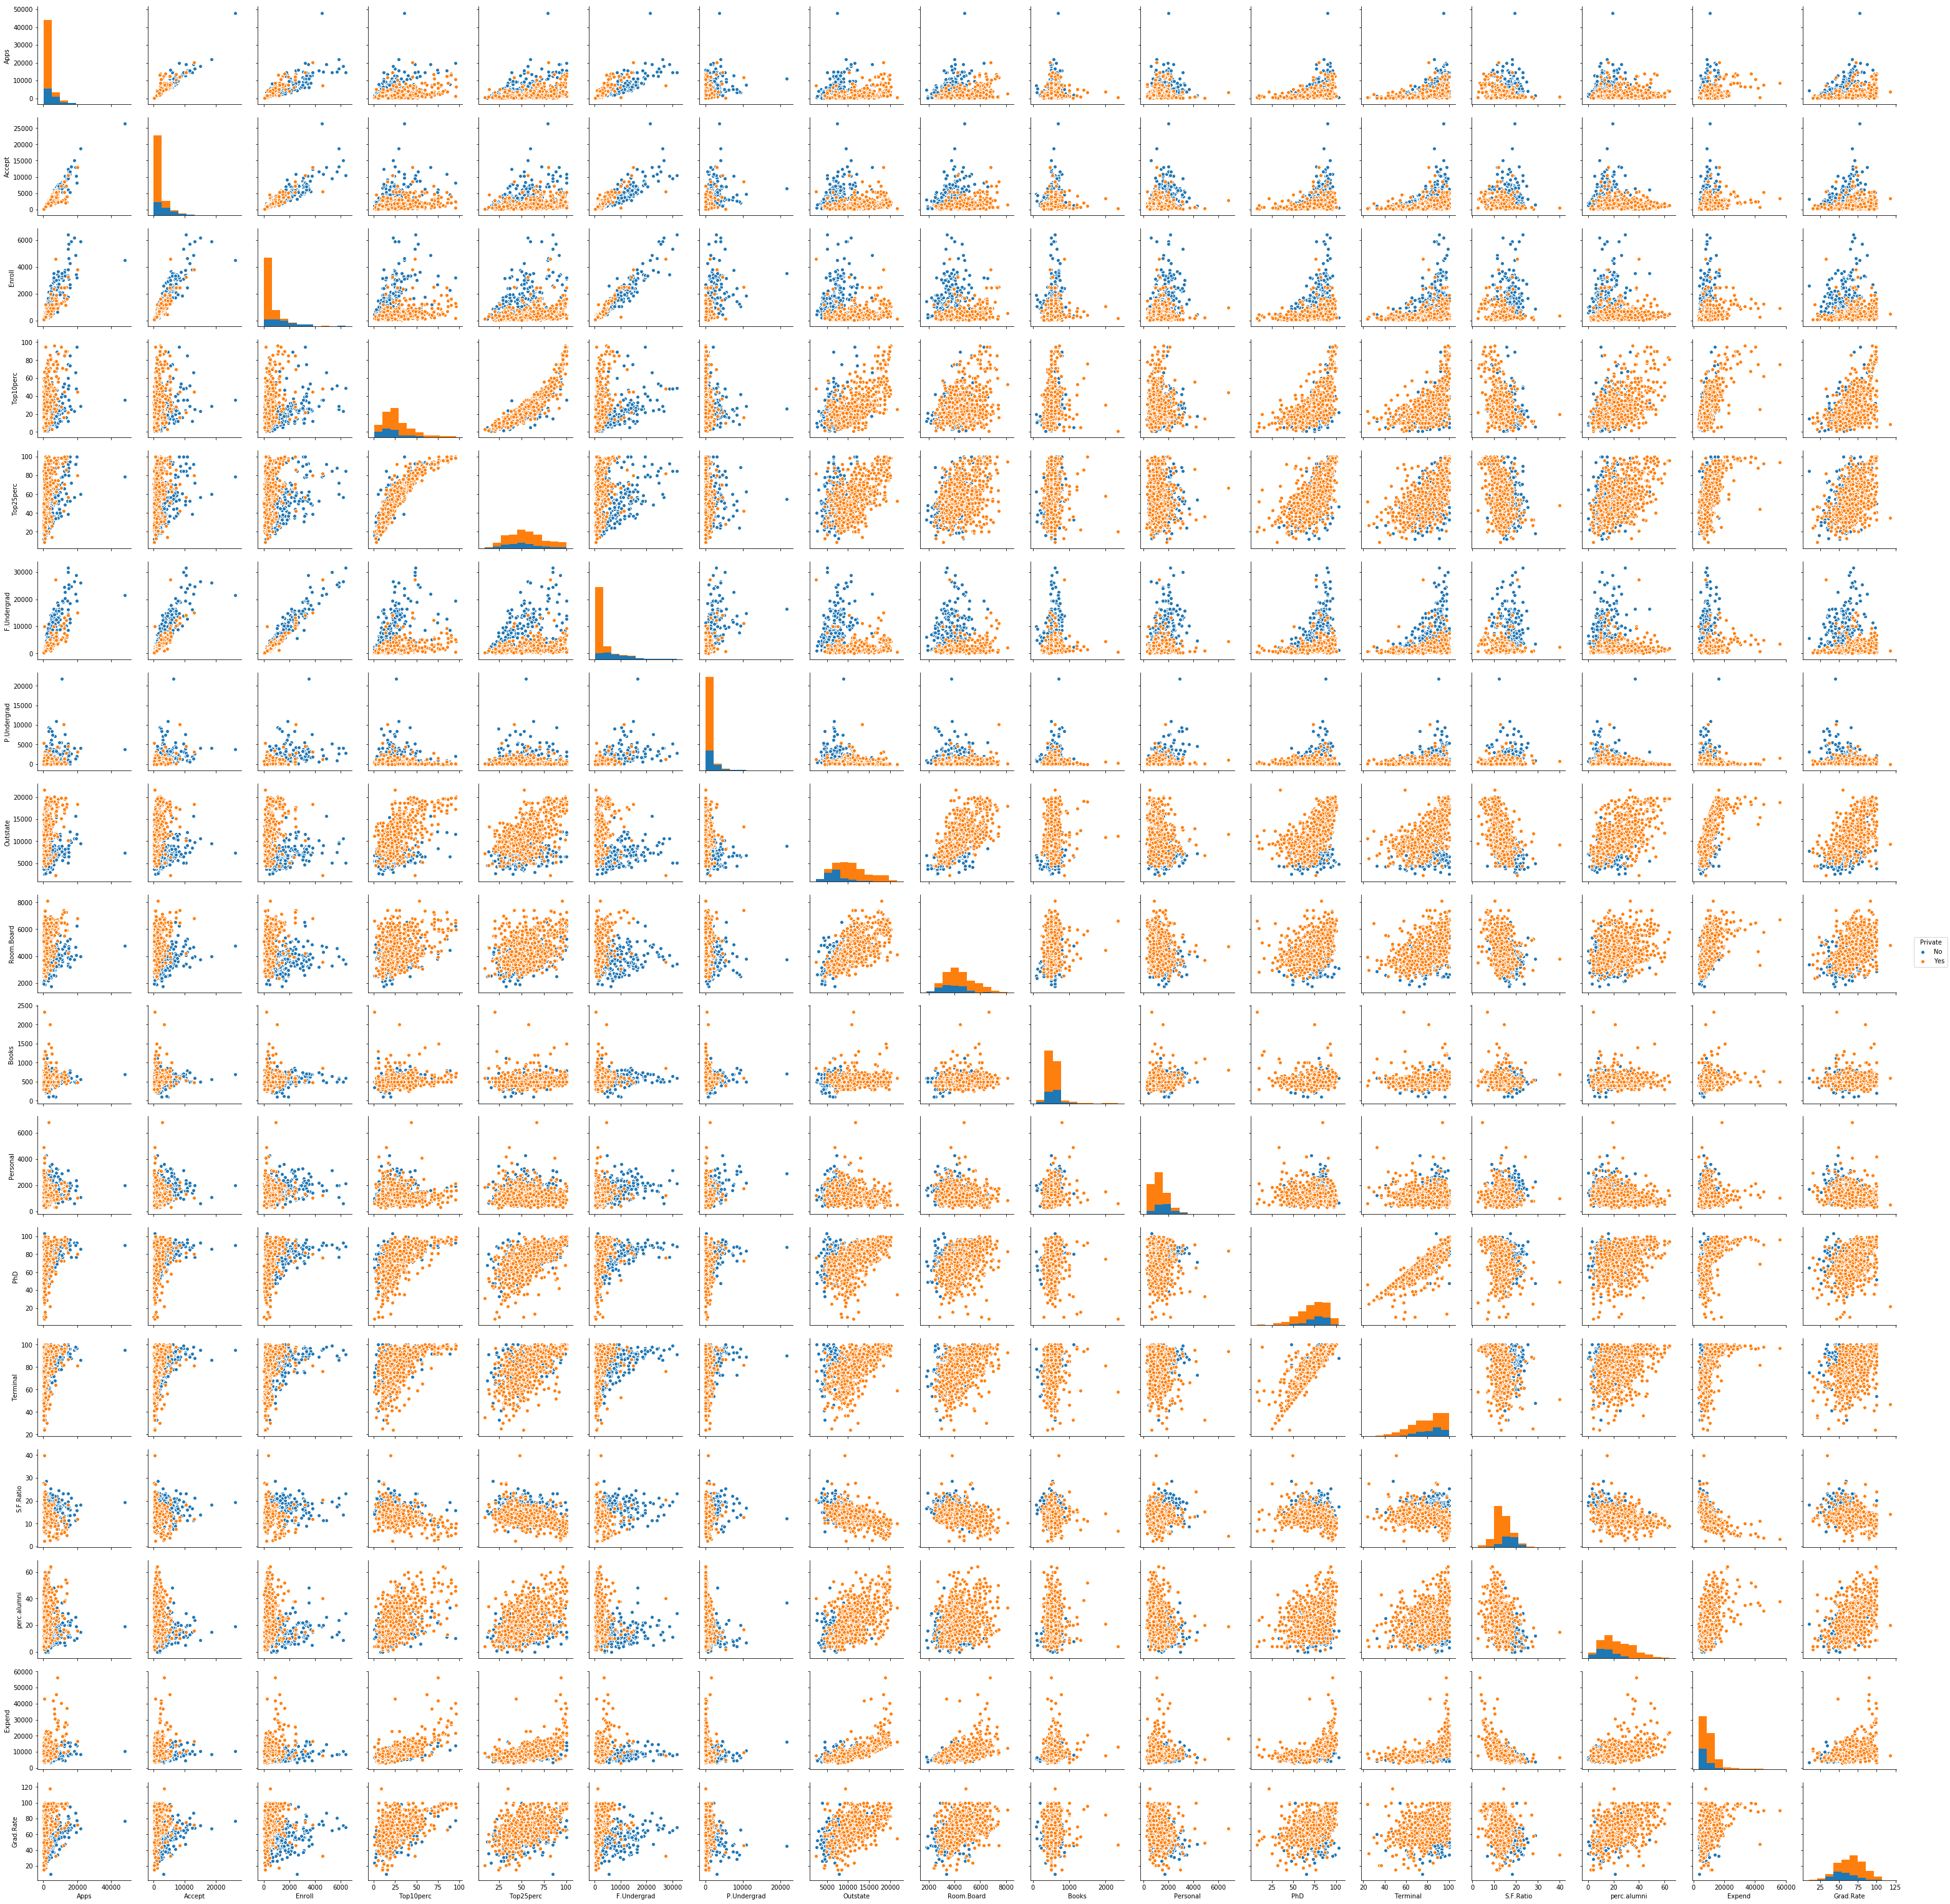

In [15]:
import seaborn as sns

sns.pairplot(college, hue='Private')

There are more full-time undergraduates in public schools than in private schools. Curiously, the estimate personal spending seems a bit higher for public students.

#### Exercise 8c

Use the `plot()` function to produce side-by-side box plots of **Outstate** versus **Private**.

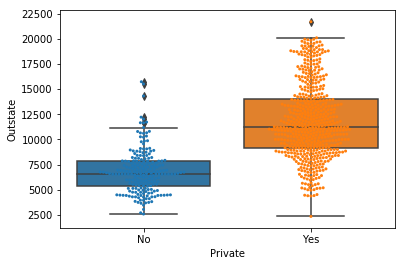

In [33]:
sns.boxplot('Private', 'Outstate', data=college)
sns.swarmplot('Private', 'Outstate', data=college, size=3)

#### Exercise 8d

Create a new qualitative variable, called **Elite**, by binning the **Top10perc** variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%. Use the `summary()` function to see how many elite universities there are.

In [70]:
college['Elite'] = ['Yes' if row else 'No' for row in college.Top10perc >= 50]
college.Elite.value_counts()

No     694
Yes     83
Name: Elite, dtype: int64

Now use the `plot()` function to produce side-by-side boxplots of **Outstate** versus **Elite**.

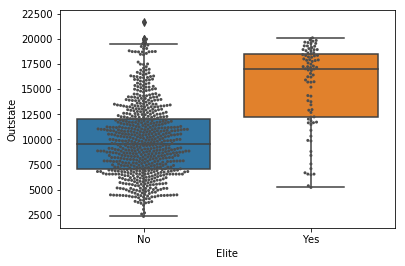

In [79]:
sns.boxplot('Elite', 'Outstate', data=college)
sns.swarmplot('Elite', 'Outstate', data=college, size=3, color='.3');

#### Exercise 8e

Use the `hist()` function to produce some histograms with differing numbers of bins for a few of the quantitative variables.

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


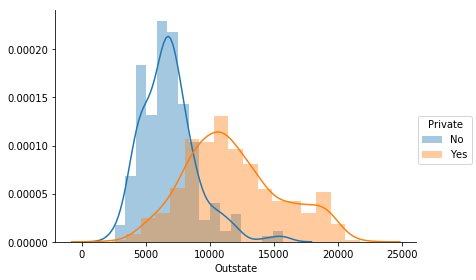

In [133]:
g = sns.FacetGrid(college, hue='Private', size=4, aspect=1.5, legend_out=True)
g.map(sns.distplot, 'Outstate').add_legend();

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


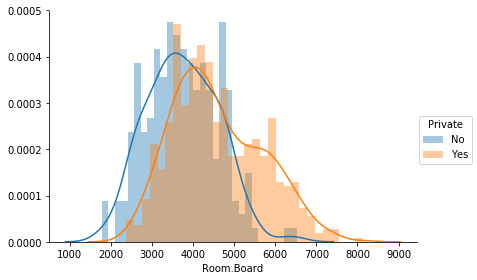

In [138]:
g = sns.FacetGrid(college, hue='Private', size=4, aspect=1.5, legend_out=True)
g.map(sns.distplot, 'Room.Board', bins=30).add_legend();

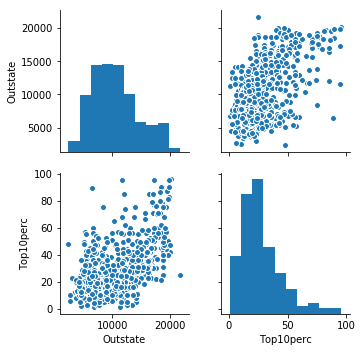

In [139]:
sns.pairplot(college[['Outstate', 'Top10perc', 'Elite', 'Private']])

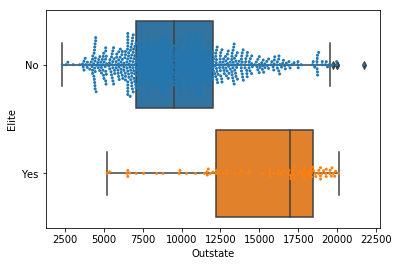

In [147]:
sns.boxplot('Outstate', 'Elite', data=college)
sns.swarmplot('Outstate', 'Elite', data=college, size=3);

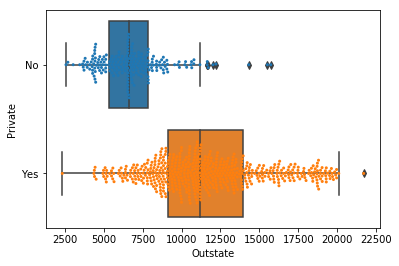

In [146]:
sns.boxplot('Outstate', 'Private', data=college)
sns.swarmplot('Outstate', 'Private', data=college, size=3);

I don’t understand what is a Out-of-state private tuition. Does the value of 
out-of-state tuition actually mean the private tuition cost?

The **Elite** universities have higher out-of-state tuitions, which is expected.

Let’s see the number of applications that were sent, accepted and the final number of new students.

Also, we will compute the percentage of applications that were accepted, and the same for new students enrolled.

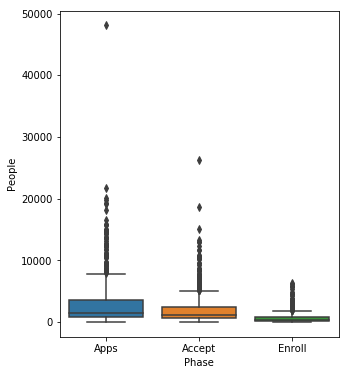

In [162]:
phases = college[['Apps', 'Accept', 'Enroll']].melt(var_name='Phase', value_name='People')
plt.figure(figsize=(5, 6))
sns.boxplot('Phase', 'People', data=phases);

There is a single university with almost 50k applications. Let’s see which one it is.array

In [165]:
famous_university = college.query('Apps == Apps.max()')
famous_university

Private   Apps  Accept  Enroll  Top10perc  Top25perc  \
Rutgers at New Brunswick      No  48094   26330    4520         36         79   

                          F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Rutgers at New Brunswick        21401         3712      7410        4748   

                             ...      Personal  PhD  Terminal  S.F.Ratio  \
Rutgers at New Brunswick     ...          2009   90        95       19.5   

                          perc.alumni  Expend  Grad.Rate  Elite AcceptPerc  \
Rutgers at New Brunswick           19   10474         77     No    0.54747   

                          EnrollPerc  
Rutgers at New Brunswick    0.093983  

[1 rows x 21 columns]

It is a public university, with a low **Top10perc**. Let’s draw the boxplots again with horizontal lines marking this specific observation in each boxplot.

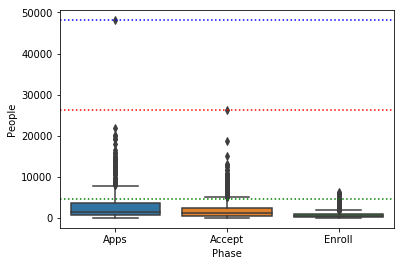

In [190]:
ax = sns.boxplot('Phase', 'People', data=phases)
ax.axhline(int(famous_university.Apps), c='b', ls=':')
ax.axhline(int(famous_university.Accept), c='r', ls=':')
ax.axhline(int(famous_university.Enroll), c='g', ls=':')

Let’s plot the percentage of applications that were accepted, and the same for new students enrolled.

We will add the same horizontal lines marking where **Rutgers at New Brunswick** is located.

AcceptPerc  EnrollPerc
Rutgers at New Brunswick        0.55        0.09

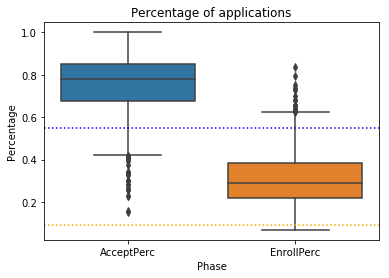

In [204]:
college['AcceptPerc'] = college.Accept / college.Apps
college['EnrollPerc'] = college.Enroll / college.Apps
famous_university = college.query('Apps == Apps.max()')
percentage = college[['AcceptPerc', 'EnrollPerc']].melt(var_name='Phase', value_name='Percentage')
ax = sns.boxplot('Phase', 'Percentage', data=percentage)
ax.axhline(float(famous_university.AcceptPerc), c='blue', ls=':')
ax.axhline(float(famous_university.EnrollPerc), c='orange', ls=':')
ax.set_title('Percentage of applications')
famous_university[['AcceptPerc', 'EnrollPerc']].round(2)

Out of the almost 49k application **Rutgers at New Brunswick** has received, 50% was accepted, and only 10% of the total students actually enrolled.

### Exercise 9: The Auto data set

The **Auto MPG** data set has gas mileage, horsepower, and other information for cars.

*“The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.”* (Quinlan, 1993)

Make sure that the missing values have been removed from the data.

In [207]:
auto = pd.read_csv('data/Auto.csv', na_values='?', index_col='name')
auto.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1

#### Exercise 9a

Which of the predictors are quantitative, and which are qualitative?

**Variable** | **Type** | **Description**
:- | :- | :-
**mpg** | continuous | Miles Per Gallon, the fuel efficiency
**cylinders** | multi-valued discrete | 
**displacement** | continuous | The volume of the car’s engine in cubic inches
**horsepower** | continuous | The rate at which mechanical energy is expended
**weight** | continuous | The car’s weight
**acceleration** | continuous | The car’s acceleration
**model year** | multi-valued discrete | Year of fabrication
**origin** | multi-valued discrete | 
**car name** | string | Not unique for each instance

#### Exercise 9b

What is the *range* of each quantitative predictor? You can answer this using the `range()` function.

In [216]:
auto.describe().loc[['min', 'max']]

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
min   9.0        3.0          68.0        46.0  1613.0           8.0  70.0   
max  46.6        8.0         455.0       230.0  5140.0          24.8  82.0   

     origin  
min     1.0  
max     3.0

#### Exercise 9c

What is the mean and standard deviation of each quantitative predictor?

In [221]:
auto.describe().loc[['mean', 'std']].round(1)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
mean  23.5        5.5         193.5       104.5  2970.3          15.6  76.0   
std    7.8        1.7         104.4        38.5   847.9           2.7   3.7   

      origin  
mean     1.6  
std      0.8

#### Exercise 9d

Now remove the 10<sup>th</sup> through 85<sup>th</sup> observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [233]:
auto.drop(auto.index[9:85]).describe().loc[['min', 'max', 'mean', 'std']].round(1)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
min   11.0        3.0          68.0        46.0  1755.0           9.5  70.0   
max   46.6        8.0         455.0       230.0  4952.0          24.6  82.0   
mean  25.1        5.3         179.9        99.3  2885.4          15.7  77.6   
std    8.0        1.6          96.4        34.3   798.9           2.6   3.0   

      origin  
min      1.0  
max      3.0  
mean     1.6  
std      0.8

#### Exercise 9e

Using the full data set, investigate the predictors graphically,
using scatter plots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

##### Paired plots

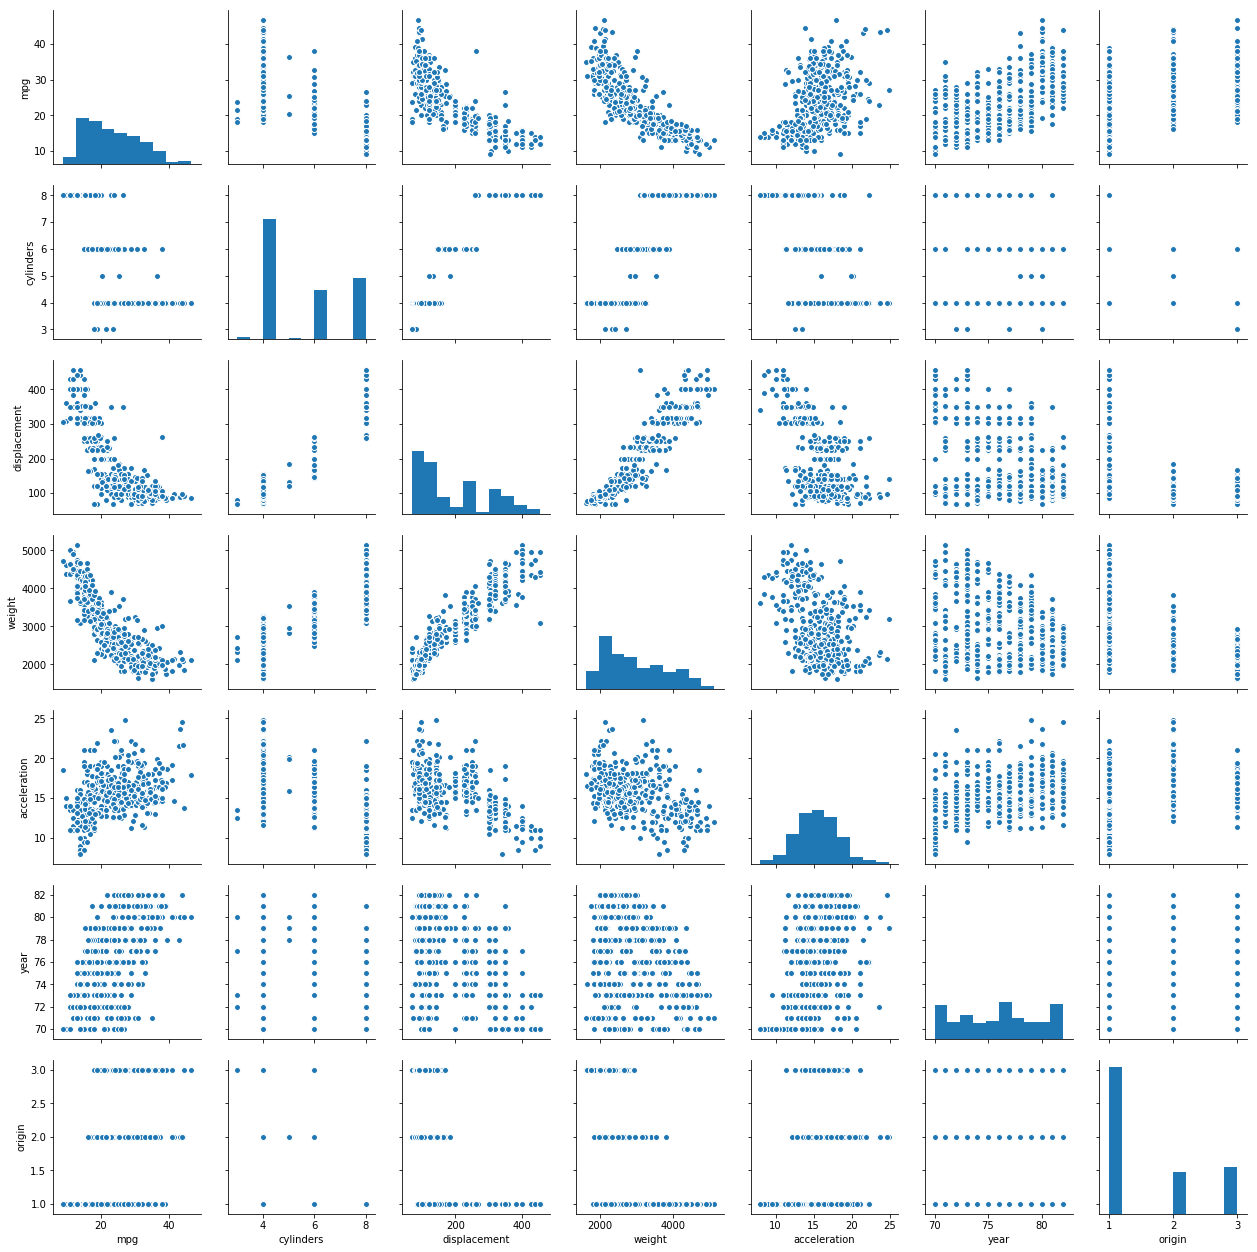

In [241]:
sns.pairplot(auto.drop('horsepower', axis=1));

The higher the acceleration, the weight, and the horsepower, the less efficient the car is. As it consumes more fuel, the Miles Per Gallon decreases.

These features seem highly correlated to **MPG** measure. Let’s see the correlation matrix.

##### Correlation

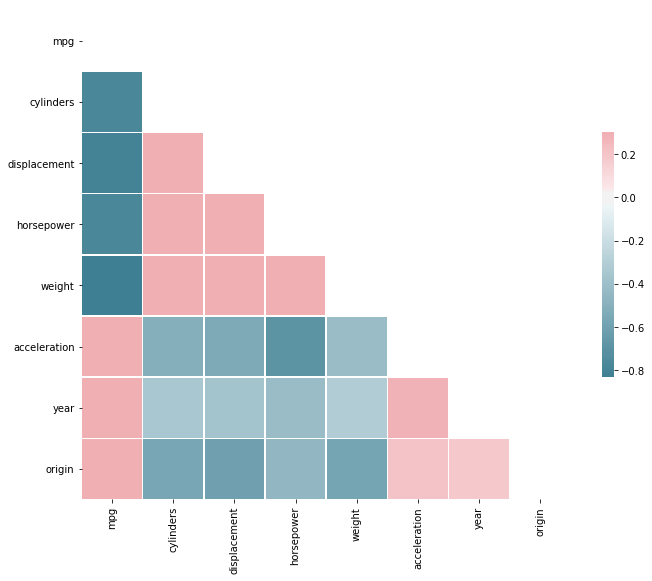

In [243]:
corr = auto.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As the years passed, the cars have gotten more efficient in general. But they not necessarily have decreased in size or power.

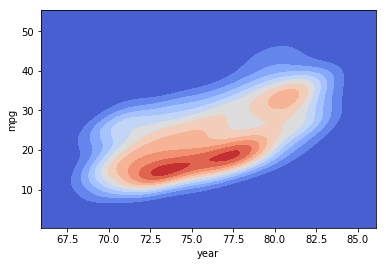

In [252]:
sns.kdeplot(auto.year, auto.mpg, shade=True, cmap='coolwarm')

It seems the MPG doubled in a decade. Let’s confirm.

/usr/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


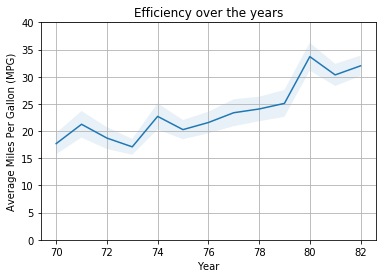

In [280]:
by_year = auto.groupby('year').agg({
    'mpg': {
        'mpg_mean': 'mean',
        'mpg_min': lambda x: x.mean() - 1.96 * x.std() / np.sqrt(len(x)),
        'mpg_max': lambda x: x.mean() + 1.96 * x.std() / np.sqrt(len(x)),
    }
})
by_year.columns = by_year.columns.droplevel(0)
#sns.tsplot(auto[['year', 'mpg']])
plt.plot(by_year.index, by_year.mpg_mean)
plt.fill_between(by_year.index, by_year.mpg_min, by_year.mpg_max, alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Average Miles Per Gallon (MPG)')
plt.title('Efficiency over the years')
plt.ylim((0, 40))
plt.grid()

Visually I would say the MPG increased by 10 gallons in a decade, from ~29 in 1970 to ~29 (the smooth line) in 1980. I prefer using the smooth line than the observed data because the average fell down in 1981.

(f) Suppose that we wish to predict gas mileage (**mpg**) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting **mpg**? Justify your answer.

Yes, the 1970s decade had a great improvement on the car engines and the plots suggest the specification of engines can predict the fuel efficiency.

### Exercise 10: The Boston data set

In [328]:
Boston = pd.read_csv('data/Boston.csv', index_col=0)

#### Exercise 10a

How many rows are in this data set? How many columns? What
do the rows and columns represent?

Description collected from the manual, `?Boston`. This a data set of housing values in Boston suburbs.

**Variable** | **Description**
:- | :-
**crim** | per capita crime rate by town.
**zn** | proportion of residential land zoned for lots over 25,000 sq.ft.
**indus** | proportion of non-retail business acres per town.
**chas** | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
**nox** | $NO_x$, nitrogen oxides concentration (parts per 10 million).
**rm** | average number of rooms per dwelling.
**age** | proportion of owner-occupied units built prior to 1940.
**dis** | weighted mean of distances to five Boston employment centres.
**rad** | index of accessibility to radial highways.
**tax** | full-value property-tax rate per \$10,000.
**ptratio** | pupil-teacher ratio by town.
**black** | $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town.
**lstat** | lower status of the population (percent).
**medv** | median value of owner-occupied homes in \$1000s.


In [285]:
Boston.shape

(506, 14)

In [289]:
Boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2

#### Exercise 10b

(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

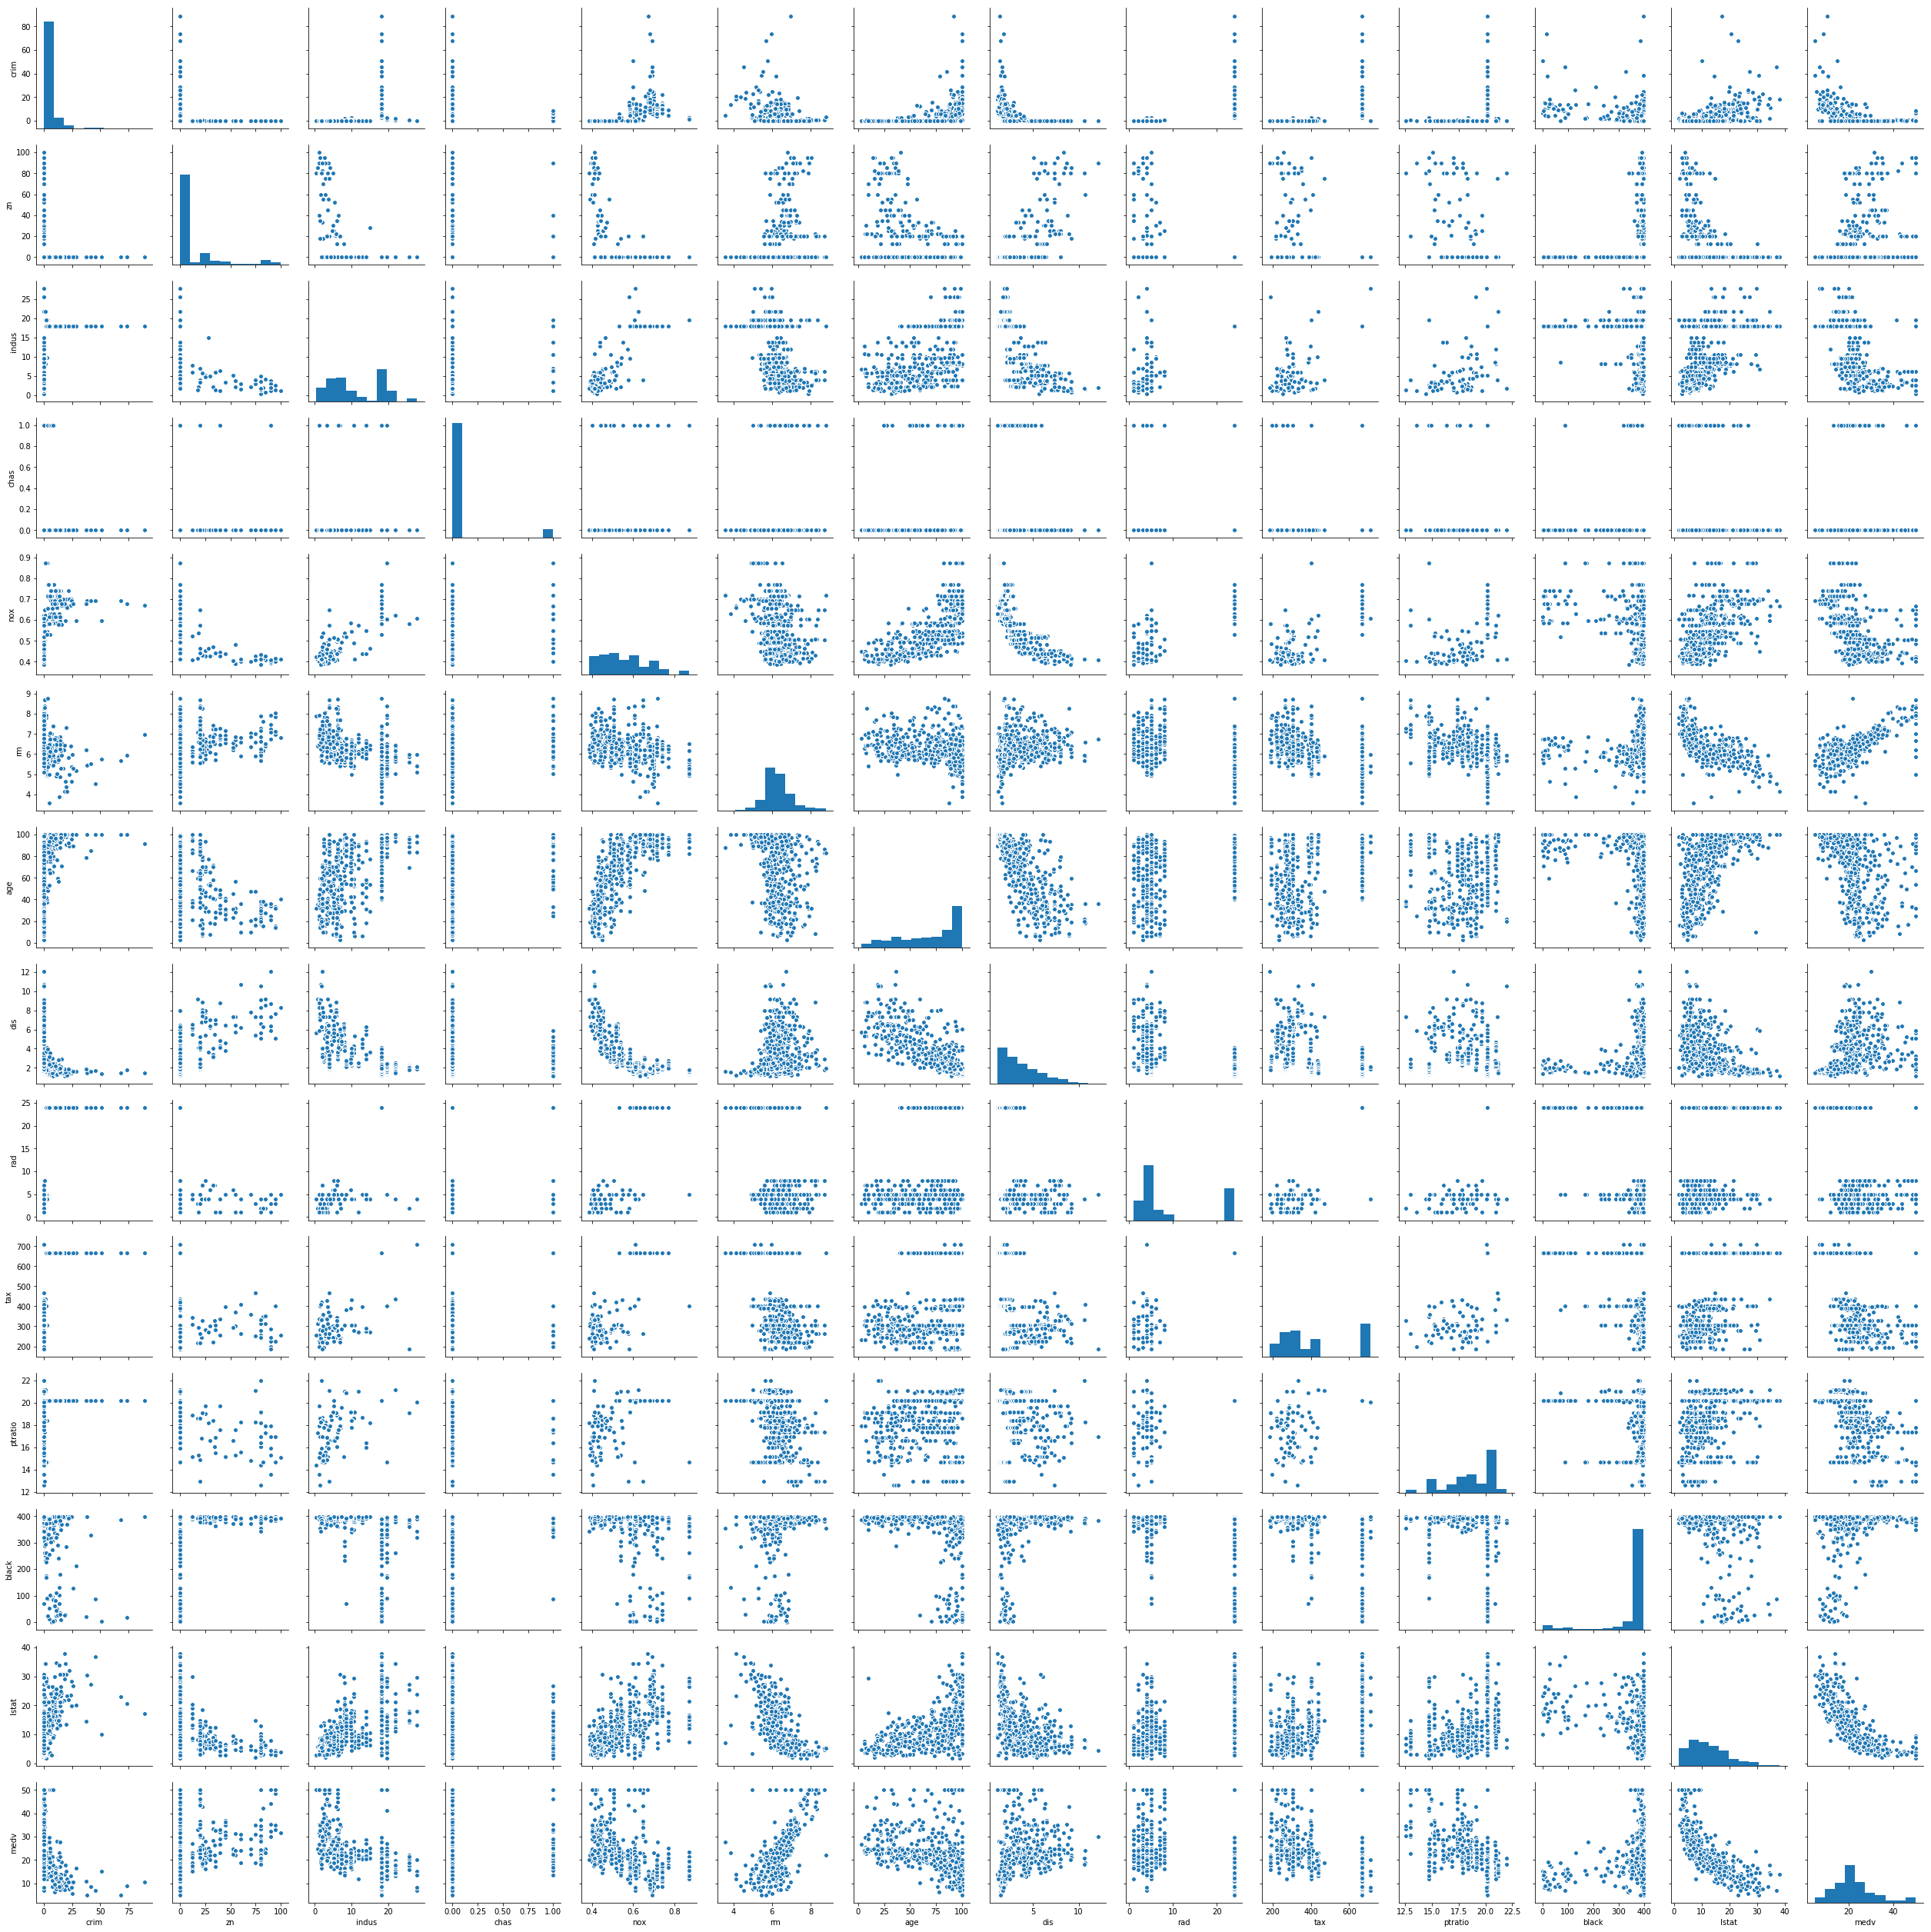

In [294]:
sns.pairplot(Boston)

Lower status of population (**lstat**) and average number of rooms per dwelling (**rm**) are strongly correlated with the median value of owner-occupied homes in \$1000s (**medv**). Let’s visualize the correlation with the correlation matrix. 

It seems some features have many constant values. Let’s check this with a heat map of the values.

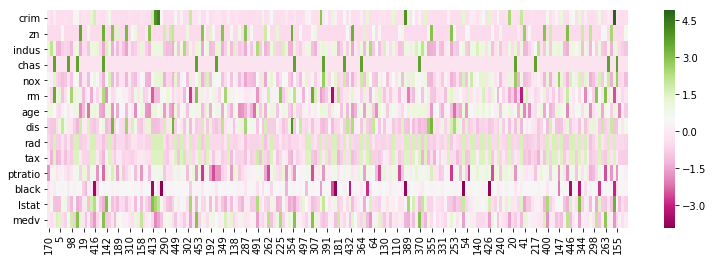

In [309]:
from sklearn.preprocessing import scale

BostonScaled = pd.DataFrame(scale(Boston), columns=Boston.columns, index=Boston.index)

plt.figure(figsize=(13, 4))
sns.heatmap(BostonScaled.sample(200).transpose(), cmap='PiYG')

Indeed, the correlation dendrogram of columns above shows that some features 
have many constant values at the same time, implying the existance of colinear predictors. 

Note how the index of accessibility to radial highways (**rad**) and 
the full-value property-tax rate per \$10,000 (**tax**) have a constant value 
together. The pupil–teacher ration (**ptratio**) also seem to be constant at the same times —
observe the upper dendrogram of rows. However, **ptratio** 
is clustered way after (**rad**, **tax**) were.

Let’s see which values **rad** and **tax** assume.

In [323]:
Boston[['rad', 'tax', 'ptratio']].describe().round(1)

rad    tax  ptratio
count  506.0  506.0    506.0
mean     9.5  408.2     18.5
std      8.7  168.5      2.2
min      1.0  187.0     12.6
25%      4.0  279.0     17.4
50%      5.0  330.0     19.0
75%     24.0  666.0     20.2
max     24.0  711.0     22.0

In [318]:
Boston.rad.value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64

In [320]:
tax_count = Boston.tax.value_counts()
tax_count[tax_count > 10]

666    132
307     40
403     30
437     15
304     14
264     12
398     12
277     11
384     11
Name: tax, dtype: int64

In [324]:
ptratio_counts = Boston.ptratio.value_counts()
ptratio_counts[ptratio_counts > 10]

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
16.6     16
18.4     16
21.2     15
15.2     13
13.0     12
20.9     11
17.9     11
Name: ptratio, dtype: int64

It looks like when **rad** is 24, **tax** is 666. Let’s confirm and also get
the values for **ptratio**.

In [330]:
rad_rows = Boston.rad == 24
tax_rows = Boston.tax == 666
ptratio_rows = Boston.ptratio == 20.2

rad_rows.sum(), tax_rows.sum(), ptratio_rows.sum()

(132, 132, 140)

In [332]:
(rad_rows & tax_rows).sum(), (rad_rows & tax_rows & ptratio_rows).sum()

(132, 132)

So, we know that if **rad** is 24, then **rad** is 666, and the other way around also holds.

We can also say that if **rad** is 24, then **ptratio** is 666, but the back is not true because there is at least a **rad** and **tax** with values 5 and 224 when **ptratio**  is 666.

Now we can have some initial insights (that need to be verified):

Regarding the median house values (**medv**):
- Houses with more rooms (**rm**) are more expensive (**medv**)
- Poorer areas (**lstat**) reduce the price of houses 
- Expensive houses have a lower tax rate, perhaps because the tax is limited to a value.
- The atmospheric chemistry (**nox**) is a measure of nitric oxide (NO) and nitrogen dioxide (NO2) in the area. Industrial areas of town centers can have a higher concentration, which is associated with a reduced price of houses. In fact, the proportion of non-retail business acres per town (**indus**) has a high correlation with **nox**.
- The pupil–teacher ratio by town (**ptarion**) seems to be related with **proportion of residential land zoned**

#### Exercise 10c

Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

Let’s plot the correlation matrix.

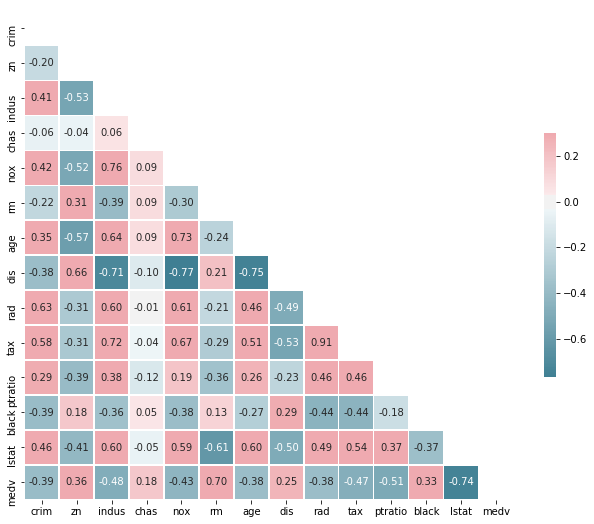

In [338]:
corr = Boston.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

These predictors seem to be related to the crime rate:

- Positive, higher than 0.3: **rad, tax, lstat, age, indus, nox**
- Negative, lower than -0.3: **medv, black, dis**

#### Exercise 10d

Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil–teacher ratios? Comment on
the range of each predictor.

##### High crime rates

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


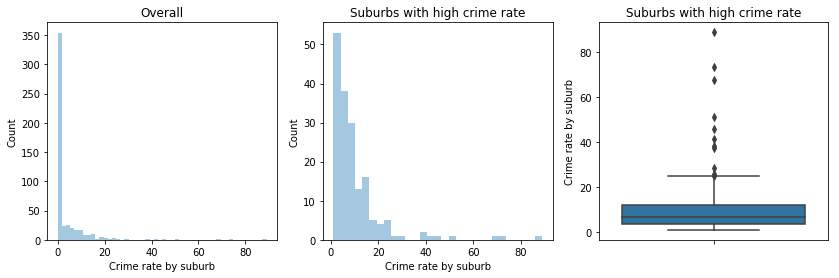

In [356]:
large_crim = Boston.query('crim > 1')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
sns.distplot(Boston.crim, kde=False, ax=ax1)
sns.distplot(large_crim.crim, kde=False, ax=ax2)
sns.boxplot(y='crim', data=large_crim, ax=ax3)
ax1.set_ylabel('Count')
ax1.set_xlabel('Crime rate by suburb')
ax1.set_title('Overall')
ax2.set_ylabel('Count')
ax2.set_xlabel('Crime rate by suburb')
ax2.set_title('Suburbs with high crime rate')
ax3.set_ylabel('Crime rate by suburb')
ax3.set_title('Suburbs with high crime rate');

The suburds that seem to have high crime rates far higher than the others 
are those which the crime rate exceeds 25%:

In [357]:
np.where(Boston.crim > 25)[0]

array([380, 398, 400, 404, 405, 410, 413, 414, 417, 418, 427])

##### Tax rates

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


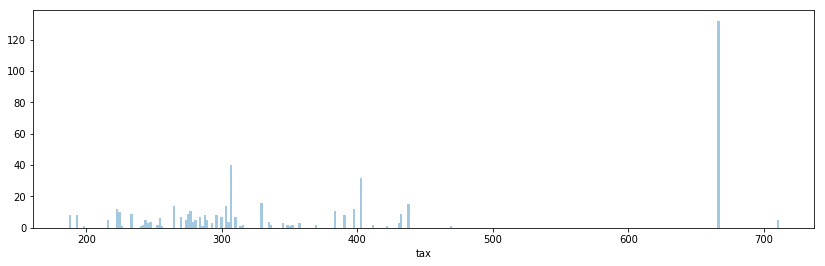

In [364]:
plt.figure(figsize=(14, 4))
sns.distplot(Boston.tax, bins=300, kde=False)

Although 666 looked an outlier, there are a few tax vaues even higher, 711.
If actual values, they are quite high compared to the the rest.

##### Pupil–Teacher Ratio

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


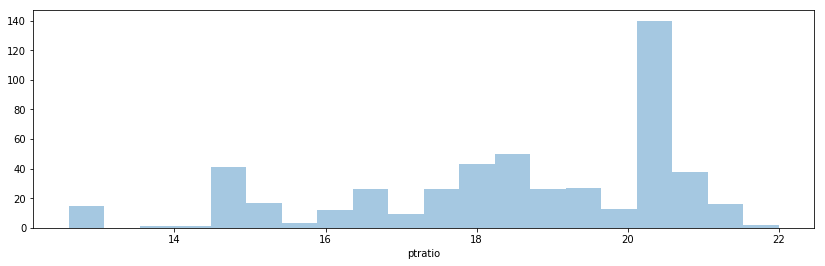

In [368]:
plt.figure(figsize=(14, 4))
sns.distplot(Boston.ptratio, bins=20, kde=False)

Since 22.5 pupils for each teacher is acceptable, the pupil–teacher ratio looks 
without high ratios.

#### Exercise 10e

How many of the suburbs in this data set bound the Charles
river?

In [369]:
Boston.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

#### Exercise 10f

What is the median pupil-teacher ratio among the towns in this data set?

In [370]:
Boston.ptratio.median()

19.05

#### Exercise 10g

Which suburb of Boston has lowest median value of owner-occupied homes? 
What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [372]:
lowest_suburb = Boston.query('medv == medv.min()')
lowest_suburb

crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
399  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
406  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio   black  lstat  medv  
399     20.2  396.90  30.59   5.0  
406     20.2  384.97  22.98   5.0

Let’s draw the histogram for each predictor with a red, dashed vertical line
marking the position of the surburb with lowest median housing value.

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


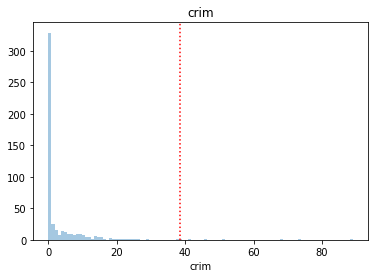

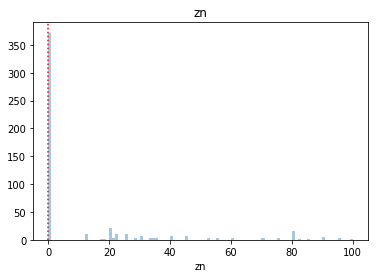

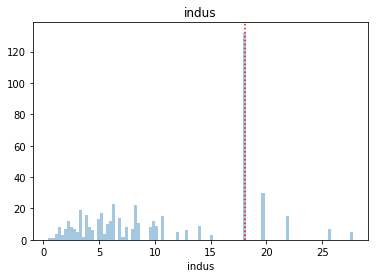

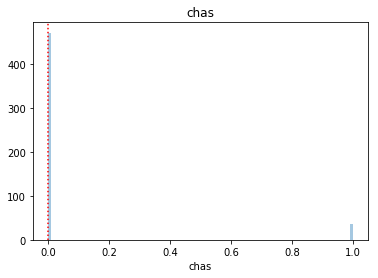

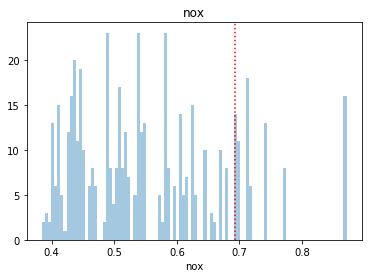

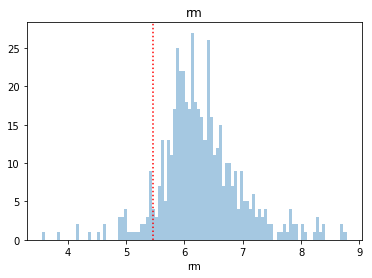

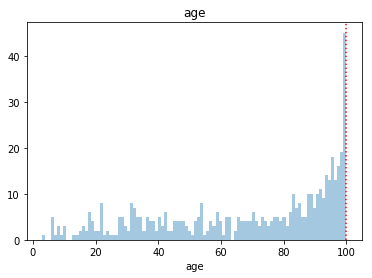

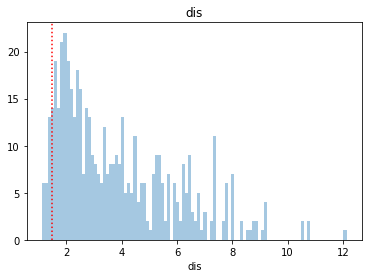

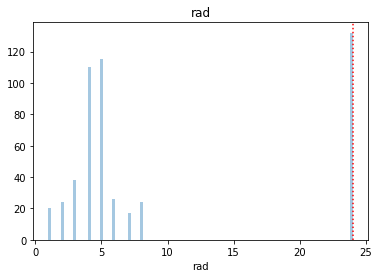

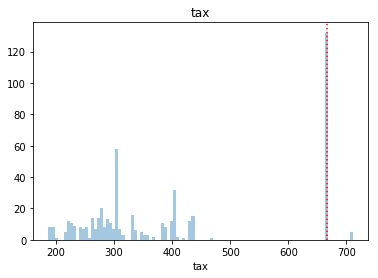

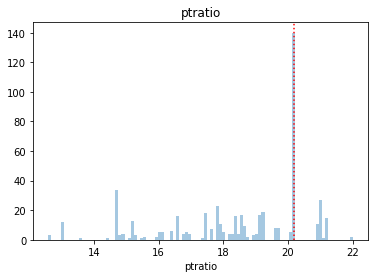

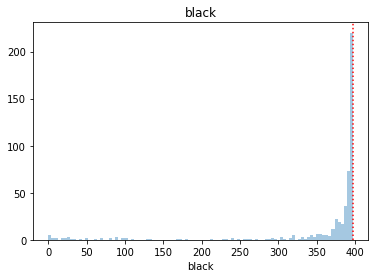

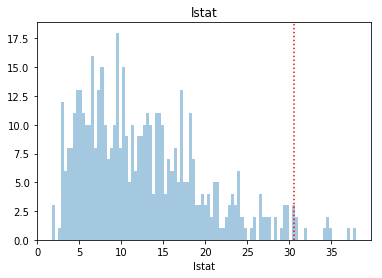

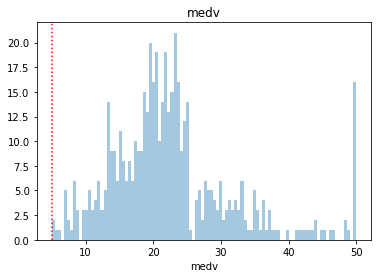

In [382]:
for colname in Boston.columns:
    ax = sns.distplot(Boston[colname], bins=100, kde=False)
    ax.axvline(float(lowest_suburb.iloc[0][colname]), c='r', ls=':')
    ax.set_title(colname)
    plt.show()

This seems to be an old suburb of blacks that is not currently 
residential, with a high crime rate.

The tax rate seems to be placed quite high, but as we saw earlier, a **tax**
can actually be a missing value.

In [384]:
from statsmodels.distributions.empirical_distribution import ECDF

ECDF(Boston.nox)(lowest_suburb.iloc[0].nox)

0.8577075098814229

Additionally, this could be an industrial area because the **nox** is located at the 86% percentile.

#### Exercise 10h

In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [396]:
rooms = np.ceil(Boston.rm)
rooms.value_counts()[[4, 5, 6, 7, 8, 9]]

4      2
5     14
6    157
7    269
8     51
9     13
Name: rm, dtype: int64

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


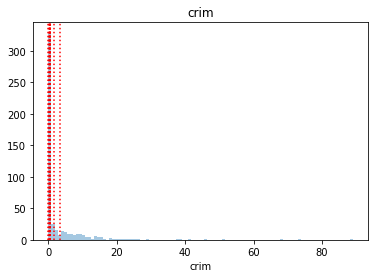

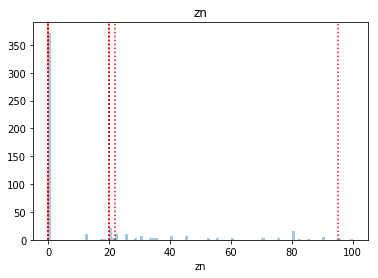

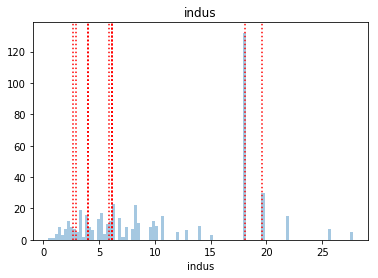

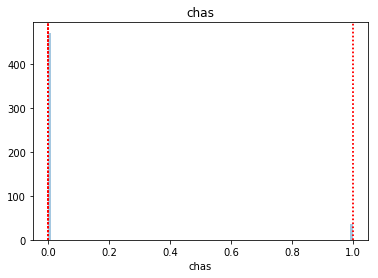

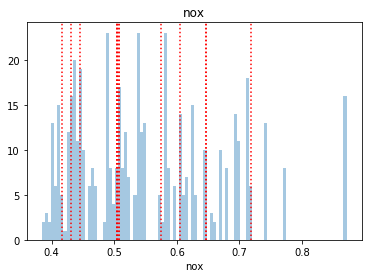

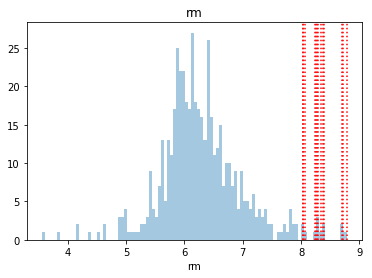

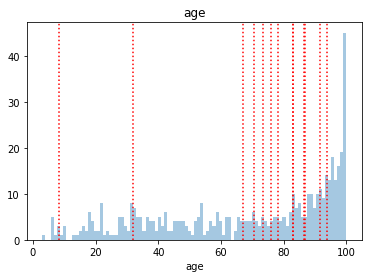

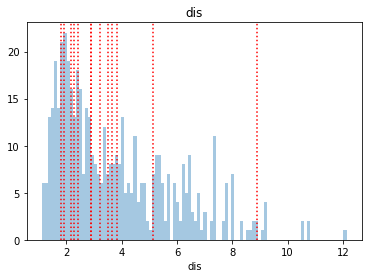

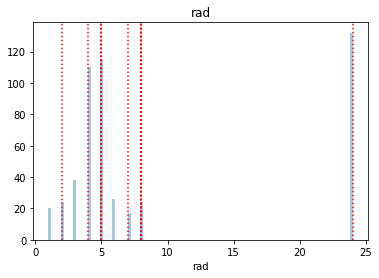

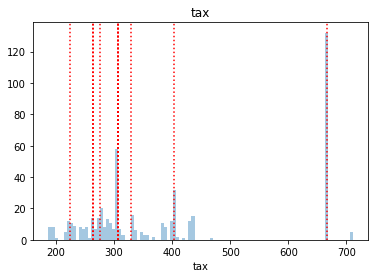

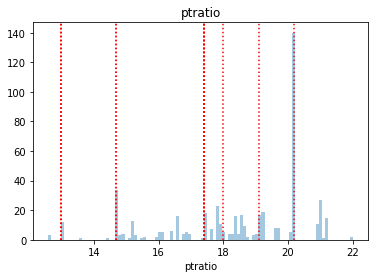

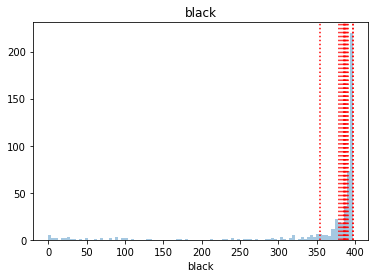

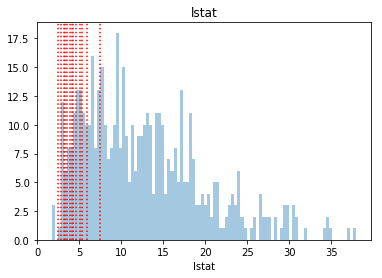

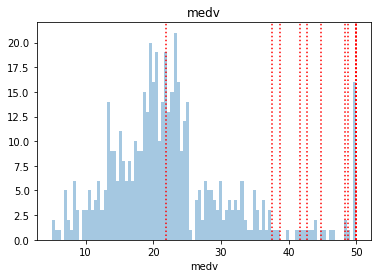

In [398]:
for colname in Boston.columns:
    ax = sns.distplot(Boston[colname], bins=100, kde=False)
    for x in Boston.query('rm > 8')[colname]:
        ax.axvline(float(x), c='r', ls=':')
    ax.set_title(colname)
    plt.show()

These refer to suburbs with the largest and most expensive houses.